In [1771]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1772]:
import requests
from bs4 import BeautifulSoup

In [1773]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [1774]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [1775]:
import warnings
warnings.filterwarnings(action='ignore') 

In [1776]:
import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import os

In [1777]:
# # 날짜 dataframe 만들기
# start_date = pd.to_datetime('2015-01-01') ## 시작 날짜
# end_date = pd.to_datetime('2022-03-07') ## 마지막 날짜
 
# dates = pd.date_range(start_date,end_date,freq='M') ## 월단위로 생성
# dates = pd.DataFrame(dates, columns=['date'])

In [1778]:
# 년,월,일 -> 날짜
def change_date(x):
    ret = []
    for da in x.split():
        ret.append(da[:-1])
    return '.'.join(ret)

In [1779]:
# K, M, B 변환
def m_to_k(x):
    if x[-1] == 'M':
        return float(x[:-1]) * 1000
    elif x[-1] == 'K':
        return float(x[:-1])
    elif x[-1] == 'B':
        return float(x[:-1]) * 1000000
    else:
        return np.nan

In [1780]:
# 나스닥 종합지수, 상해 종합지수, 달러지수 병합

In [1781]:
## 나스닥
df_nasdaq = pd.read_csv('나스닥종합지수.csv')
df_nasdaq.drop(['오픈','고가','저가'], axis=1, inplace=True)
df_nasdaq.rename(columns={'날짜':'date', '종가':'nasdaq', '거래량':'nasdaq_거래량', '변동 %':'nasdaq_volatility'},
                 inplace=True)

### 날짜 전처리
df_nasdaq.date = df_nasdaq.date.apply(change_date)
df_nasdaq.date = pd.to_datetime(df_nasdaq.date)

### 가격 float타입
df_nasdaq.nasdaq = df_nasdaq.nasdaq.str.replace(',','').astype('float')

### 거래량 전처리
df_nasdaq['nasdaq_거래량'] = df_nasdaq['nasdaq_거래량'].apply(m_to_k)

### 변동% 전처리
df_nasdaq['nasdaq_volatility'] = df_nasdaq.nasdaq_volatility.apply(lambda x : float(x[:-1]))

In [1782]:
## 상해 종합지수
df_ssec = pd.read_csv('상하이종합 내역.csv')
df_ssec.drop(['오픈','고가','저가'], axis=1, inplace=True)
df_ssec.rename(columns={'날짜':'date', '종가':'ssec', '거래량':'ssec_거래량', '변동 %':'ssec_volatility'},
               inplace=True)

### 날짜 전처리
df_ssec.date = df_ssec.date.apply(change_date)
df_ssec.date = pd.to_datetime(df_ssec.date)

### 가격 float타입
df_ssec.ssec = df_ssec.ssec.str.replace(',','').astype('float')

### 거래량 전처리
df_ssec['ssec_거래량'] = df_ssec['ssec_거래량'].apply(m_to_k)

### 변동% 전처리
df_ssec['ssec_volatility'] = df_ssec.ssec_volatility.apply(lambda x : float(x[:-1]))

In [1783]:
## 달러지수
df_dollar = pd.read_csv('달러 지수.csv')
df_dollar.drop(['오픈','고가','저가', '거래량'], axis=1, inplace=True)
df_dollar.rename(columns={'날짜':'date', '종가':'dollar', '변동 %':'dollar_volatility'}, inplace=True)

### 날짜 전처리
df_dollar.date = df_dollar.date.apply(change_date)
df_dollar.date = pd.to_datetime(df_dollar.date)

### 변동% 전처리
df_dollar['dollar_volatility'] = df_dollar.dollar_volatility.apply(lambda x : float(x[:-1]))

In [1784]:
## 병합
df_composite_index = pd.merge(df_nasdaq, df_ssec, how='outer', on='date')
df_composite_index = pd.merge(df_composite_index, df_dollar, how='outer', on='date')
# df_composite_index.to_csv('종합지수_merge.csv')

In [1785]:
# 중국 2차전지, 전기차

In [1786]:
## EVE Energy
df_eve = pd.read_csv('EVE Energy 주가.csv')
df_eve.drop(['오픈', '고가', '저가'], axis = 1, inplace = True)
df_eve.columns = 'date', 'EVE종가', 'EVE거래량', 'EVE변동률'
df_eve['date'] = pd.to_datetime(df_eve['date'].apply(change_date))
df_eve['EVE거래량'] = df_eve['EVE거래량'].apply(m_to_k).astype('float')
df_eve['EVE변동률'] = df_eve['EVE변동률'].apply(lambda x : x[:-1]).astype('float')

In [1787]:
## BYD 주가
df_byd = pd.read_csv('BYD 주가.csv')
df_byd.drop(['오픈', '고가', '저가'], axis = 1, inplace=True)
df_byd.columns = 'date', 'BYD종가', 'BYD거래량', 'BYD변동률'
df_byd['BYD거래량'] = df_byd['BYD거래량'].apply(m_to_k).astype('float')
df_byd['date'] = pd.to_datetime(df_byd['date'].apply(change_date))
df_byd['BYD변동률'] = df_byd['BYD변동률'].apply(lambda x : x[:-1]).astype('float')

In [1788]:
## eve, byd merge
merge_eve_byd = pd.merge(df_eve, df_byd, on = 'date', how = 'outer')
# merge_eve_byd.to_csv('중국2차전지.csv', header = False, index = False)

In [1789]:
# 희토류, 리튬, 코발트 병합

In [1790]:
## 리튬
df_li = pd.read_excel('리튬+가격2022-03-08.xls')
df_li.drop(['등락가', '등락비율', '재고량'], axis=1, inplace=True)
df_li.columns = ['date', 'li_price']
df_li.date = pd.to_datetime(df_li.date)
# df_li.to_csv('data_li.csv')

df_li = pd.read_csv('data_li.csv')
df_li.date = pd.to_datetime(df_li.date)

In [1791]:
## 코발트
df_co = pd.read_csv('코발트 가격.csv')
df_co.drop(['오픈','고가','저가','거래량'], axis=1, inplace=True)
df_co.rename(columns={'날짜':'date', '종가':'co', '변동 %':'co_volatility'},
                 inplace=True)

### 날짜 전처리
df_co.date = df_co.date.apply(change_date)
df_co.date = pd.to_datetime(df_co.date)

### 가격 float타입
df_co.co = df_co.co.str.replace(',','').astype('float')

### 변동% 전처리
df_co['co_volatility'] = df_co.co_volatility.apply(lambda x : float(x[:-1]))

In [1792]:
## 희토류
df_ra = pd.read_excel('희토류 가격.xlsx')
df_ra.drop(['등락가', '재고량', '등락비율'], axis = 1, inplace = True)
df_ra.columns = 'date', '희토류가격'
df_ra.date = pd.to_datetime(df_ra.date)

In [1793]:
## 병합
merge_lico = pd.merge(df_li, df_co, on = 'date', how = 'outer')
merge_licora = pd.merge(merge_lico, df_ra, on = 'date', how = 'outer')
# merge_licora.to_csv('배터리원자재_merge.csv')

In [1794]:
# 재무제표

In [1795]:
## 재무제표1 크롤링
url = 'https://www.choicestock.co.kr/search/invest/TSLA/MRQ'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
datas = soup.select('table.tableRanking')

## 데이터 프레임 생성
li = []
for data in datas:
    table = parser_functions.make2d(data)
    df = pd.DataFrame(data=table[1:], columns=table[0])
    li.append(df)
    
## 합병
df = pd.concat(li)

## 저장
# df.to_csv('fn_statement.csv')

In [1796]:
## 재무제표1 전처리
df_fn_statements = pd.read_csv('tesla 재무제표.csv')
df_fn_statements = df_fn_statements.set_index('Unnamed: 1')
df_fn_statements = df_fn_statements.drop(['Unnamed: 0','초이스스탁US 프리미엄', '프리미엄', '무료'], axis = 1)
df_fn_statements.dropna(inplace = True)
df_fn_statements = df_fn_statements.T
df_fn_statements = df_fn_statements.astype('object')
df_fn_statements = df_fn_statements.reset_index()
df_fn_statements = df_fn_statements.rename_axis(columns={'Unnamed: 1' : ''})
df_fn_statements = df_fn_statements.rename(columns={'index':'date'})
df_fn_statements.date = df_fn_statements.date.apply(lambda x : x.replace('.','/'))
df_fn_statements.date = df_fn_statements.date.apply(lambda x : '/'.join(x.split('/')[::-1]))
df_fn_statements.date = pd.to_datetime(df_fn_statements.date)
df_fn_statements.drop(['중단손익'], axis=1, inplace=True)

drop_col = ['매입채무등', '단기차입금', '장기차입금', '이연수익', '이연세부채','기타부채', '부채총계',
            '이익잉여금', '기타포괄익', '자본총계', '영업활동', '투자활동', '재무활동', '환율변동',
            '현금의증감', '자본적지출', '잉여현금', '현금성자산', '단기투자', '매출채권등', '재고자산',
            '장기투자', '유형자산', '무형자산', '이연세자산', '기타자산','EBITDA', '법인세', '판매관리비',
            '연구개발비']

df_fn_statements.drop(drop_col, axis=1, inplace=True)
df_fn_statements = df_fn_statements.iloc[:28]

# float 타입변환
col = df_fn_statements.columns.values
for c in col[1:]:
    df_fn_statements.loc[:,c] = df_fn_statements.loc[:,c].apply(lambda x : x.replace(',',''))
    df_fn_statements[c] = df_fn_statements[c].astype('float')

# 이익률 계산
df_fn_statements['매출총이익률'] = (df_fn_statements['매출총이익']/df_fn_statements['매출액'])*100
df_fn_statements['영업이익률'] = (df_fn_statements['영업이익']/df_fn_statements['매출액'])*100
# df_fn_statements.to_csv('fn_statements.csv')

In [1797]:
## 재무제표2 크롤링
url = 'https://www.choicestock.co.kr/search/invest/TSLA'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
datas = soup.select('table')
li = []
for data in datas:
    table = parser_functions.make2d(data)
    df = pd.DataFrame(data=table[1:], columns=table[0])
    li.append(df)
### 병합
df = pd.concat(li)

In [1798]:
## 재무제표2 전처리

In [1799]:
df = df.iloc[:12, :].drop(['초이스스탁US 프리미엄', '프리미엄', '무료'], axis=1).set_index('').T
df.to_csv('재무재표2_전처리.csv')

In [1800]:
df_fn_statements2 = pd.read_csv('재무재표2_전처리.csv')
df_fn_statements2 = df_fn_statements2.rename(columns={'Unnamed: 0':'date'})
df_fn_statements2.date = df_fn_statements2.date.apply(lambda x : x.replace('.','/'))
df_fn_statements2.date = df_fn_statements2.date.apply(lambda x : '/'.join(x.split('/')[::-1]))
df_fn_statements2.date = pd.to_datetime(df_fn_statements2.date)
df_fn_statements2.drop(['부채비율(%)','이자보상배수(배)'], axis=1, inplace=True)

In [1801]:
# 리튬관련 etf

In [1802]:
## LIT etf
df_lit = pd.read_csv('리튬 etf LIT.csv')
df_lit.drop(['Open', 'High', 'Low', 'Close'], axis = 1, inplace=True)
df_lit.columns = 'date', 'LIT조정종가', 'LIT거래량'
df_lit['date'] = pd.to_datetime(df_lit['date'])

In [1803]:
## SGL ETF
df_sgl = pd.read_csv('리튬전지 SGL etf.csv')
df_sgl.drop(['오픈', '고가', '저가', '거래량'], axis = 1, inplace = True)
df_sgl.columns = 'date', 'SGL종가', 'SGL변동률'
df_sgl['date'] = df_sgl['date'].apply(change_date)
df_sgl['date'] = pd.to_datetime(df_sgl['date'])
### 변동% 전처리
df_sgl['SGL변동률'] = df_sgl.SGL변동률.apply(lambda x : float(x[:-1]))

In [1804]:
## 리튬 etf 병합
df_lithium_etf = pd.merge(df_lit, df_sgl, on = 'date', how = 'outer')
# df_lithium_etf.to_csv('lithium_etf_merge')

In [1805]:
# 반도체관련 etf

In [1806]:
## psi etf (미국)
df_psi = pd.read_csv("미국 반도체 etf PSI.csv")
df_psi = df_psi.rename(columns={'날짜':'date'})
df_psi = df_psi.rename(columns={'거래량':'PSI거래량','종가':'PSI종가'})
df_psi.drop(['오픈','고가','저가','변동 %'], axis=1, inplace=True)
df_psi.date = pd.to_datetime(df_psi.date.apply(change_date))
df_psi.PSI거래량 = df_psi.PSI거래량.apply(m_to_k).astype('float')

In [1807]:
## soxx etf (미국)
df_soxx = pd.read_csv("미국 반도체 etf SOXX.csv")
df_soxx = df_soxx.rename(columns = {'날짜' : 'date','거래량' : 'SOXX거래량','종가' : 'SOXX종가'})
df_soxx.drop(['오픈','고가','저가','변동 %'], axis=1, inplace=True)
df_soxx.date = pd.to_datetime(df_soxx.date.apply(change_date))
df_soxx.SOXX거래량 = df_soxx.SOXX거래량.apply(m_to_k).astype("float")

In [1808]:
## soxl etf (미국)
df_soxl = pd.read_csv("미국 반도체 etf SOXL.csv")
df_soxl = df_soxl.rename(columns = {'날짜' : 'date','거래량' : 'SOXL거래량','종가' : 'SOXL종가'})
df_soxl.drop(['오픈','고가','저가','변동 %'], axis=1, inplace=True)
df_soxl.date = pd.to_datetime(df_soxl.date.apply(change_date))
df_soxl.SOXL거래량 = df_soxl.SOXL거래량.apply(m_to_k).astype("float")

In [1809]:
## 반도체 etf merge
merge_outer = pd.merge(df_psi, df_soxx,how='outer', on='date')
semi_etf_merge = pd.merge(merge_outer,df_soxl, how='outer', on='date')
# semi_etf_merge.to_csv('반도체 etf merge.csv')

In [1810]:
# 전기차관련 etf

In [1811]:
## driv etf (미국)
df_driv = pd.read_csv("미국 전기차 erf DRIV.csv")
df_driv = df_driv.rename(columns = {'날짜':'date', '종가':'DRIV종가','거래량':'DRIV거래량'})
df_driv.drop(['오픈','고가','저가','변동 %'], axis =1, inplace=True)
df_driv.date = pd.to_datetime(df_driv.date.apply(change_date))
df_driv.DRIV거래량 = df_driv.DRIV거래량.apply(m_to_k).astype('float')

In [1812]:
## acdc etf (캐나다)
df_acdc = pd.read_csv("캐나다 전기차 etf ACDC.csv")
df_acdc = df_acdc.rename(columns = {'날짜':'date', '종가':'ACDC종가','거래량':'ACDC거래량'})
df_acdc.drop(['오픈','고가','저가','변동 %'], axis =1, inplace=True)
df_acdc.date = pd.to_datetime(df_acdc.date.apply(change_date))
df_acdc.ACDC거래량 = df_acdc.ACDC거래량.apply(m_to_k).astype('float')

In [1813]:
## 전기차 etf 병합
ele_car_merge = pd.merge(df_driv, df_acdc, how='outer', on='date')
# ele_car_merge.to_csv('전기차 etf merge.csv')

In [1814]:
# 테슬라 주가(target)

In [1815]:
## 테슬라
df_tesla = pd.read_csv('테슬라 주가.csv')
df_tesla.drop(['오픈','고가','저가'], axis=1, inplace=True)
df_tesla.rename(columns={'날짜':'date', '종가':'tesla', '거래량':'tesla_거래량', '변동 %':'tesla_volatility'},
                 inplace=True)

### 가격 float타입
df_tesla.tesla = df_tesla.tesla.str.replace(',','').astype('float')

### 날짜 전처리
df_tesla.date = df_tesla.date.apply(change_date)
df_tesla.date = pd.to_datetime(df_tesla.date)

### 거래량 전처리
df_tesla['tesla_거래량'] = df_tesla['tesla_거래량'].apply(m_to_k)

### 변동% 전처리
df_tesla['tesla_volatility'] = df_tesla.tesla_volatility.apply(lambda x : float(x[:-1]))

In [1816]:
# 유가 선물지수, 탄소배출권

In [1817]:
## 유가 선물지수
df_oli_price = pd.read_csv('국제 유가 선물.csv')
df_oli_price.drop(['오픈','고가','저가', '거래량'], axis=1, inplace=True)
df_oli_price.rename(columns={'날짜':'date', '종가':'oli_price', '변동 %':'oli_price_volatility'}, inplace=True)

### 날짜 전처리
df_oli_price.date = df_oli_price.date.apply(change_date)
df_oli_price.date = pd.to_datetime(df_oli_price.date)

### 변동% 전처리
df_oli_price['oli_price_volatility'] = df_oli_price.oli_price_volatility.apply(lambda x : float(x[:-1]))

In [1818]:
## 탄소배출권
df_carbon_credits = pd.read_csv('탄소배출권.csv')
df_carbon_credits.drop(['오픈','고가','저가', '거래량'], axis=1, inplace=True)
df_carbon_credits.rename(columns={'날짜':'date', '종가':'carbon_credits', '변동 %':'carbon_credits_volatility'}, inplace=True)

### 날짜 전처리
df_carbon_credits.date = df_carbon_credits.date.apply(change_date)
df_carbon_credits.date = pd.to_datetime(df_carbon_credits.date)

### 변동% 전처리
df_carbon_credits['carbon_credits_volatility'] = df_carbon_credits.carbon_credits_volatility.apply(lambda x : float(x[:-1]))

In [1819]:
## 유가, 탄소배출권 병합
merge_oli_carbon = pd.merge(df_oli_price, df_carbon_credits, how='outer', on='date')
# merge_oli_carbon.to_csv('유가 탄소 merge.csv')

In [1820]:
# 미국 전기세

In [1821]:
## 미국 전기세 전처리
df_e_fee_usa = pd.read_csv('미국 전기세.csv', skiprows=4)
df_e_fee_usa = df_e_fee_usa.drop(['units','source key'], axis=1)
df_e_fee_usa = df_e_fee_usa.set_index('description').T
df_e_fee_usa = pd.DataFrame(df_e_fee_usa['United States : industrial'])
df_e_fee_usa = df_e_fee_usa.reset_index()
df_e_fee_usa = df_e_fee_usa.rename(columns={'United States : industrial' : 'elec_fee', 'index':'date'})
df_e_fee_usa = df_e_fee_usa.iloc[168:]
df_e_fee_usa.date = pd.to_datetime(df_e_fee_usa['date'])
df_e_fee_usa.elec_fee = df_e_fee_usa.elec_fee.astype('float')

In [1822]:
# 알류미늄, 구리, 신재생

In [1823]:
## REGI(신재생)
### REGI 데이터 전처리
df_regi = pd.read_csv('./REGI 역사적 데이터/REGI 역사적 데이터.csv')
df_regi.drop(['오픈', '고가', '저가'], axis=1, inplace=True)
df_regi.columns = ['date', 'REGI_price', 'REGI_vol', 'REGI_change']
df_regi.date = df_regi.date.apply(change_date)
df_regi.date = pd.to_datetime(df_regi.date)
df_regi.REGI_vol = df_regi.REGI_vol.apply(m_to_k)
df_regi['REGI_change'] = df_regi['REGI_change'].apply(lambda x: float(x.replace('%', '')))

In [1824]:
## 알루미늄 전처리
df_alu = pd.read_csv('알루미늄 내역.csv')
df_alu.drop(['오픈', '고가', '저가'], axis=1, inplace=True)
df_alu.columns = ['date', 'alu_price', 'alu_vol', 'alu_change']
df_alu.date = df_alu.date.apply(change_date)
df_alu.date = pd.to_datetime(df_alu.date)
df_alu['alu_price'] = df_alu['alu_price'].apply(lambda x: x.replace(',', ''))
df_alu['alu_price'] = pd.to_numeric(df_alu['alu_price'])
df_alu['alu_vol'] = df_alu['alu_vol'].apply(m_to_k)
df_alu['alu_change'] = df_alu['alu_change'].apply(lambda x: float(x.replace('%', '')))

In [1825]:
## 구리 데이터 전처리
df_cu = pd.read_csv('영국 구리 선물 내역.csv')
df_cu.drop(['오픈', '고가', '저가', '거래량'], axis=1, inplace=True)
df_cu.columns = ['date', 'cu_price', 'cu_change']
df_cu.date = df_cu.date.apply(change_date)
df_cu.date = pd.to_datetime(df_cu.date)
df_cu.cu_price = df_cu.cu_price.apply(lambda x: float(x.replace(',', '')))
df_cu['cu_change'] = df_cu['cu_change'].apply(lambda x: float(x.replace('%', '')))

In [1826]:
## 알류미늄, 구리, 신재생 병합
al_cu_regi_merge = pd.merge(df_alu, df_cu, on='date', how='outer')
al_cu_regi_merge = pd.merge(al_cu_regi_merge, df_regi, on='date', how='outer')
# al_cu_regi_merge = pd.read_csv('alu_cu_REGI_df.csv')
# al_cu_regi_merge.drop('Unnamed: 0', axis=1, inplace=True)
al_cu_regi_merge.date = pd.to_datetime(al_cu_regi_merge.date)

In [1827]:
# from datetime import datetime, timedelta
# df_tesla['date'] = pd.DatetimeIndex(df_tesla['date']) + timedelta(weeks=3) 

In [1828]:
# df_tesla.tesla = df_tesla.tesla.shift(periods=-5)
# df_tesla.dropna(how='any', inplace=True)

In [1829]:
# 테슬라 주가 기준 merge

In [1830]:
## 테슬라 - 미국전기세
df_total = pd.merge(df_tesla, df_e_fee_usa, how='outer', on='date')
df_total = df_total.sort_values('date')
### 전기세의 nan값은 ffill(한달 단위기 때문에)
df_total.elec_fee.fillna(method='ffill', inplace=True)
df_total.dropna(how='any',inplace=True)

In [1831]:
## 테슬라 - 유가,탄소
df_total = pd.merge(df_total, merge_oli_carbon, how='left', on='date')

In [1832]:
## 테슬라 - 중국 전기차 주가
df_total = pd.merge(df_total, merge_eve_byd, how='left', on='date')

In [1833]:
# ## 테슬라 - 전기차 etf
# df_total = pd.merge(df_total, ele_car_merge, how='left', on='date')

In [1834]:
## 테슬라 - 반도체 etf
df_total = pd.merge(df_total, semi_etf_merge, how='left', on='date')

In [1835]:
## 테슬라 - 리튬 etf
df_total = pd.merge(df_total, df_lithium_etf, how='left', on='date')

In [1836]:
## 테슬라 - 희토류, 리튬, 코발트
df_total = pd.merge(df_total, merge_licora, how='left', on='date')
### 리튬 nan값 선형보간
df_total['li_price'] = df_total['li_price'].interpolate()

### 희토류 nan값 선형보간
df_total.희토류가격 = df_total.희토류가격.interpolate()

### 코발트 nan값 선형보간
df_total.co = df_total.co.interpolate()
df_total['co_volatility'] = df_total['co_volatility'].interpolate()

In [1837]:
## 테슬라 - 종합지수
df_total = pd.merge(df_total, df_composite_index, how='left', on='date')

In [1838]:
## 테슬라 - 알루미늄, 구리, 신재생
df_total = pd.merge(df_total, al_cu_regi_merge, how='left', on='date')

In [1839]:
### 나머지 선형보간
col_total = df_total.columns.values
for col in col_total[2:]:
    df_total[col] = df_total[col].interpolate()

## 나머지 nan값 처리
df_total.fillna(method='bfill', inplace=True)

In [1857]:
from sklearn.preprocessing import StandardScaler

In [1862]:
scaled = StandardScaler()
scaled.fit(x_train)
scaled_train = scaled.transform(x_train)
scaled_test = scaled.transform(x_test)

In [1840]:
# df_total.to_csv('테슬라 총합.csv')

In [1841]:
df_total["time"]=df_total.sort_index().index+1

In [1842]:
x_train = df_total.loc[df_total.time <= 1400].drop(['date','tesla','time'], axis=1)
x_test = df_total.loc[df_total.time > 1400].drop(['date','tesla','time'], axis=1)

In [1843]:
y_train = df_total.loc[df_total.time <= 1400]['tesla']
y_test = df_total.loc[df_total.time > 1400]['tesla']

In [1863]:
lr = LinearRegression()
lr.fit(scaled_train,y_train)
preds = lr.predict(scaled_test)
r2_score(y_test,preds)

-3.0263647439094212

In [1864]:
cat = CatBoostRegressor()
cat.fit(x_train,y_train)
preds = cat.predict(x_test)
r2_score(y_test,preds)

Learning rate set to 0.043179
0:	learn: 37.2848299	total: 4.05ms	remaining: 4.05s
1:	learn: 35.9741939	total: 7.34ms	remaining: 3.66s
2:	learn: 34.8722488	total: 11.2ms	remaining: 3.72s
3:	learn: 33.7061094	total: 14.7ms	remaining: 3.66s
4:	learn: 32.5242236	total: 17.6ms	remaining: 3.51s
5:	learn: 31.4235349	total: 20.5ms	remaining: 3.39s
6:	learn: 30.4922357	total: 23.4ms	remaining: 3.32s
7:	learn: 29.4916028	total: 26.5ms	remaining: 3.28s
8:	learn: 28.5478059	total: 29.9ms	remaining: 3.29s
9:	learn: 27.6550615	total: 33.1ms	remaining: 3.28s
10:	learn: 26.8435387	total: 36.1ms	remaining: 3.25s
11:	learn: 26.0326109	total: 39ms	remaining: 3.21s
12:	learn: 25.1696001	total: 42.2ms	remaining: 3.2s
13:	learn: 24.3637240	total: 44.1ms	remaining: 3.1s
14:	learn: 23.6001202	total: 47ms	remaining: 3.08s
15:	learn: 22.8725238	total: 49.9ms	remaining: 3.07s
16:	learn: 22.1671158	total: 52.7ms	remaining: 3.05s
17:	learn: 21.4519993	total: 55.7ms	remaining: 3.04s
18:	learn: 20.7936872	total: 59m

179:	learn: 3.6952370	total: 540ms	remaining: 2.46s
180:	learn: 3.6743434	total: 543ms	remaining: 2.46s
181:	learn: 3.6637538	total: 547ms	remaining: 2.46s
182:	learn: 3.6457800	total: 550ms	remaining: 2.45s
183:	learn: 3.6258470	total: 553ms	remaining: 2.45s
184:	learn: 3.6135849	total: 555ms	remaining: 2.45s
185:	learn: 3.6053680	total: 558ms	remaining: 2.44s
186:	learn: 3.5855305	total: 561ms	remaining: 2.44s
187:	learn: 3.5663291	total: 564ms	remaining: 2.44s
188:	learn: 3.5535320	total: 567ms	remaining: 2.43s
189:	learn: 3.5370985	total: 570ms	remaining: 2.43s
190:	learn: 3.5211358	total: 573ms	remaining: 2.43s
191:	learn: 3.5038843	total: 576ms	remaining: 2.42s
192:	learn: 3.4900460	total: 579ms	remaining: 2.42s
193:	learn: 3.4856804	total: 582ms	remaining: 2.42s
194:	learn: 3.4741668	total: 585ms	remaining: 2.41s
195:	learn: 3.4642464	total: 588ms	remaining: 2.41s
196:	learn: 3.4482773	total: 591ms	remaining: 2.41s
197:	learn: 3.4378116	total: 594ms	remaining: 2.4s
198:	learn: 3

357:	learn: 2.0864375	total: 1.08s	remaining: 1.94s
358:	learn: 2.0788026	total: 1.08s	remaining: 1.94s
359:	learn: 2.0728284	total: 1.09s	remaining: 1.93s
360:	learn: 2.0689141	total: 1.09s	remaining: 1.93s
361:	learn: 2.0636070	total: 1.09s	remaining: 1.93s
362:	learn: 2.0596000	total: 1.1s	remaining: 1.92s
363:	learn: 2.0553860	total: 1.1s	remaining: 1.92s
364:	learn: 2.0517313	total: 1.1s	remaining: 1.92s
365:	learn: 2.0463427	total: 1.1s	remaining: 1.91s
366:	learn: 2.0404843	total: 1.11s	remaining: 1.91s
367:	learn: 2.0383719	total: 1.11s	remaining: 1.91s
368:	learn: 2.0330731	total: 1.11s	remaining: 1.9s
369:	learn: 2.0246435	total: 1.12s	remaining: 1.9s
370:	learn: 2.0195164	total: 1.12s	remaining: 1.9s
371:	learn: 2.0135844	total: 1.12s	remaining: 1.9s
372:	learn: 2.0050990	total: 1.13s	remaining: 1.89s
373:	learn: 1.9968074	total: 1.13s	remaining: 1.89s
374:	learn: 1.9923276	total: 1.13s	remaining: 1.89s
375:	learn: 1.9883391	total: 1.14s	remaining: 1.88s
376:	learn: 1.982497

522:	learn: 1.4316847	total: 1.62s	remaining: 1.48s
523:	learn: 1.4280276	total: 1.63s	remaining: 1.48s
524:	learn: 1.4250770	total: 1.63s	remaining: 1.47s
525:	learn: 1.4231145	total: 1.63s	remaining: 1.47s
526:	learn: 1.4211324	total: 1.64s	remaining: 1.47s
527:	learn: 1.4185206	total: 1.64s	remaining: 1.47s
528:	learn: 1.4165391	total: 1.64s	remaining: 1.46s
529:	learn: 1.4135360	total: 1.65s	remaining: 1.46s
530:	learn: 1.4117420	total: 1.65s	remaining: 1.46s
531:	learn: 1.4082733	total: 1.65s	remaining: 1.45s
532:	learn: 1.4045697	total: 1.66s	remaining: 1.45s
533:	learn: 1.4014510	total: 1.66s	remaining: 1.45s
534:	learn: 1.3981522	total: 1.66s	remaining: 1.44s
535:	learn: 1.3970015	total: 1.66s	remaining: 1.44s
536:	learn: 1.3948711	total: 1.67s	remaining: 1.44s
537:	learn: 1.3914376	total: 1.67s	remaining: 1.43s
538:	learn: 1.3907232	total: 1.67s	remaining: 1.43s
539:	learn: 1.3895970	total: 1.68s	remaining: 1.43s
540:	learn: 1.3861700	total: 1.68s	remaining: 1.42s
541:	learn: 

703:	learn: 1.0272660	total: 2.16s	remaining: 910ms
704:	learn: 1.0257373	total: 2.17s	remaining: 907ms
705:	learn: 1.0242072	total: 2.17s	remaining: 904ms
706:	learn: 1.0231339	total: 2.17s	remaining: 901ms
707:	learn: 1.0229090	total: 2.18s	remaining: 898ms
708:	learn: 1.0203889	total: 2.18s	remaining: 895ms
709:	learn: 1.0184455	total: 2.18s	remaining: 892ms
710:	learn: 1.0168593	total: 2.19s	remaining: 889ms
711:	learn: 1.0152743	total: 2.19s	remaining: 885ms
712:	learn: 1.0134797	total: 2.19s	remaining: 882ms
713:	learn: 1.0127803	total: 2.19s	remaining: 879ms
714:	learn: 1.0116095	total: 2.2s	remaining: 876ms
715:	learn: 1.0102336	total: 2.2s	remaining: 873ms
716:	learn: 1.0081124	total: 2.2s	remaining: 870ms
717:	learn: 1.0061483	total: 2.21s	remaining: 867ms
718:	learn: 1.0041381	total: 2.21s	remaining: 864ms
719:	learn: 1.0028497	total: 2.21s	remaining: 861ms
720:	learn: 1.0012794	total: 2.21s	remaining: 857ms
721:	learn: 0.9987697	total: 2.22s	remaining: 854ms
722:	learn: 0.9

885:	learn: 0.7832874	total: 2.71s	remaining: 348ms
886:	learn: 0.7815551	total: 2.71s	remaining: 345ms
887:	learn: 0.7799912	total: 2.71s	remaining: 342ms
888:	learn: 0.7785807	total: 2.71s	remaining: 339ms
889:	learn: 0.7772003	total: 2.72s	remaining: 336ms
890:	learn: 0.7760973	total: 2.72s	remaining: 333ms
891:	learn: 0.7747541	total: 2.72s	remaining: 330ms
892:	learn: 0.7742092	total: 2.73s	remaining: 327ms
893:	learn: 0.7732905	total: 2.73s	remaining: 324ms
894:	learn: 0.7721089	total: 2.73s	remaining: 321ms
895:	learn: 0.7708961	total: 2.74s	remaining: 318ms
896:	learn: 0.7692968	total: 2.74s	remaining: 315ms
897:	learn: 0.7690962	total: 2.74s	remaining: 311ms
898:	learn: 0.7675360	total: 2.75s	remaining: 308ms
899:	learn: 0.7669172	total: 2.75s	remaining: 305ms
900:	learn: 0.7659829	total: 2.75s	remaining: 302ms
901:	learn: 0.7639537	total: 2.75s	remaining: 299ms
902:	learn: 0.7622458	total: 2.76s	remaining: 296ms
903:	learn: 0.7611405	total: 2.76s	remaining: 293ms
904:	learn: 

-6.657033231776036

In [1868]:
coef_df = pd.DataFrame(lr.coef_, index = x_train.columns)
coef_df = coef_df.sort_values(0, ascending=False)

<AxesSubplot:xlabel='0'>

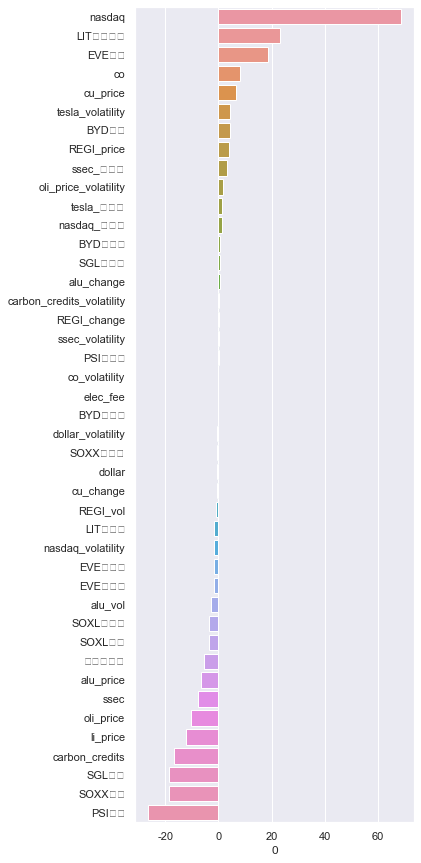

In [1869]:
# seaborn 플롯 크기조절
sns.set(rc = {'figure.figsize':(5,15)})
sns.barplot(x=coef_df[0].sort_values(ascending=False), y=coef_df.index)

In [1867]:
coef_df[0]

tesla_거래량                     1.514563
tesla_volatility              4.465727
elec_fee                     -0.188507
oli_price                   -10.369971
oli_price_volatility          1.659494
carbon_credits              -16.876934
carbon_credits_volatility     0.241205
EVE종가                        18.704297
EVE거래량                       -1.812919
EVE변동률                       -1.640115
BYD종가                         4.277176
BYD거래량                        0.669970
BYD변동률                       -0.309337
PSI종가                       -26.704537
PSI거래량                        0.067654
SOXX종가                      -18.591909
SOXX거래량                      -0.485861
SOXL종가                       -3.484598
SOXL거래량                      -3.463764
LIT조정종가                      23.197376
LIT거래량                       -1.504628
SGL종가                       -18.539328
SGL변동률                        0.479272
li_price                    -12.067889
co                            8.232519
co_volatility            